# **Pacual Capstone Group 4 Notebook - Route Optimization**

Group members: *Abdullah Alshaarawi, James Alarde, Hiromitsu Fujiyama, Sanjo Joy, Thomas Arturo Renwick Morales*

---

This notebook is organized in the following sections:

* [Part 0 - Importing the Necessary Libraries](#0)

* [Part 1 - Data Loading](#1)

* [Part 2 - Data Cleaning/ Wrangling](#2)
  * [Part 2.1 - Preliminary Analysis of the Dataset](#2.1)
  * [Part 2.2 - Dealing with Duplicates](#2.2)
  * [Part 2.3 - Ensuring Correct Data Types](#2.3)
  * [Part 2.4 - Dealing with Null/Missing Values](#2.4)
  * [Part 2.5 - ?](#2.5)

* [Part 3 - Exploratory Data Analysis](#3)



---

<a id='0'></a>
## Part 0 - Importing the Necessary Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
import numpy
import joblib

<a id='1'></a>
# Part 1 - Data Loading

In [3]:
df = pd.read_csv('dataset/Orders_Master_Data(in).csv')

<a id='2'></a>
# Part 2 - Data Cleaning/ Wrangling

<a id='2.1'></a>
## Part 2.1 - Preliminary Analysis of the Dataset

In [4]:
df.head()

,Date,City,Channel,Client ID,Promotor ID,Volume,Income,Number of orders,Median Ticket (€),Prom Contacts Month,Tel Contacts Month
0,01.01.2024,Alicante,AR,398150871,729030652,5.94,0.00,1,0.00,0,0
1,01.01.2024,Alicante,HR,410234355,551409294,48.00,21.02,1,21.02,4,0
2,02.01.2024,Alicante,AR,123463493,551409294,125.25,92.57,1,92.57,1,0
3,02.01.2024,Alicante,AR,124527399,729030652,83.00,60.94,1,60.94,4,0
4,02.01.2024,Alicante,AR,130100821,729030652,768.00,244.33,1,244.33,1,3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035735 entries, 0 to 1035734
Data columns (total 11 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Date                 1035735 non-null  object 
 1   City                 1035735 non-null  object 
 2   Channel              1035735 non-null  object 
 3   Client ID            1035735 non-null  int64  
 4   Promotor ID          1035735 non-null  int64  
 5   Volume               1035735 non-null  float64
 6   Income               1035735 non-null  float64
 7   Number of orders     1035735 non-null  int64  
 8   Median Ticket (€)    1035735 non-null  float64
 9   Prom Contacts Month  1035735 non-null  int64  
 10  Tel Contacts Month   1035735 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 86.9+ MB


In [6]:
df = df.rename(columns={'Date':'date', 
                        'City':'city', 
                        'Channel':'channel', 
                        'Client ID': 'client_id',
                        'Promotor ID': 'promotor_id',
                        'Volume': 'volume',
                        'Income': 'income',
                        'Number of orders': 'number_of_orders',
                        'Median Ticket (€)':'median_ticket',
                         'Prom Contacts Month': 'prom_contacts_month',
                          'Tel Contacts Month': 'tel_contacts_month'})

In [7]:
df.head()

,date,city,channel,client_id,promotor_id,volume,income,number_of_orders,median_ticket,prom_contacts_month,tel_contacts_month
0,01.01.2024,Alicante,AR,398150871,729030652,5.94,0.00,1,0.00,0,0
1,01.01.2024,Alicante,HR,410234355,551409294,48.00,21.02,1,21.02,4,0
2,02.01.2024,Alicante,AR,123463493,551409294,125.25,92.57,1,92.57,1,0
3,02.01.2024,Alicante,AR,124527399,729030652,83.00,60.94,1,60.94,4,0
4,02.01.2024,Alicante,AR,130100821,729030652,768.00,244.33,1,244.33,1,3


<a id='2.2'></a>
## Part 2.2 - Dealing with Duplicates

In [8]:
df.duplicated().any()

True

In [9]:
# Total number of rows
total_rows = df.shape[0]

# Number of exact duplicates (all columns identical)
exact_duplicates = df.duplicated().sum()
print(f"Exact Duplicates: {exact_duplicates} out of {total_rows}")


Exact Duplicates: 20770 out of 1035735


In [10]:
# Show all exact duplicates (entire row is duplicated) --> Exploring duplicates to see whether they were exact to then drop the first ocurrence only from the dataset.
exact_duplicates = df[df.duplicated(keep=False)]
exact_duplicates.sort_values(by=['client_id', 'date']).head(10)

,date,city,channel,client_id,promotor_id,volume,income,number_of_orders,median_ticket,prom_contacts_month,tel_contacts_month
919356,11.03.2024,Tarragona,HR,100854769,306190165,54.295,117.02,1,117.02,4,0
1018754,11.03.2024,Tarragona,HR,100854769,306190165,54.295,117.02,1,117.02,4,0
917803,12.02.2024,Tarragona,HR,100854769,306190165,105.000,45.93,1,45.93,4,0
1017201,12.02.2024,Tarragona,HR,100854769,306190165,105.000,45.93,1,45.93,4,0
925032,13.06.2024,Tarragona,HR,100854769,306190165,45.200,90.50,1,90.50,4,0
1024430,13.06.2024,Tarragona,HR,100854769,306190165,45.200,90.50,1,90.50,4,0
930843,16.09.2024,Tarragona,HR,100854769,306190165,129.000,74.14,1,74.14,4,0
1030241,16.09.2024,Tarragona,HR,100854769,306190165,129.000,74.14,1,74.14,4,0
917063,29.01.2024,Tarragona,HR,100854769,306190165,105.000,45.93,1,45.93,4,0
1016461,29.01.2024,Tarragona,HR,100854769,306190165,105.000,45.93,1,45.93,4,0


In [11]:
df = df.drop_duplicates(keep='first')

In [12]:
# Total number of rows
total_rows = df.shape[0]

# Number of exact duplicates (all columns identical)
exact_duplicates = df.duplicated().sum()
print(f"Exact Duplicates: {exact_duplicates} out of {total_rows}")

Exact Duplicates: 0 out of 1014965


<a id='2.3'></a>
## Part 2.3 - Ensuring Correct Data Types

Data type each column should be:
* date	--> datetime type
* city	--> object
* channel --> object	
* client_id	--> object
* promotor_id --> object
* volume --> float	
* income --> float	
* number_of_orders --> integer	
* median_ticket --> float	
* prom_contacts_month --> integer	
* tel_contacts_month --> integer

In [13]:
df.dtypes

date                    object
city                    object
channel                 object
client_id                int64
promotor_id              int64
volume                 float64
income                 float64
number_of_orders         int64
median_ticket          float64
prom_contacts_month      int64
tel_contacts_month       int64
dtype: object

In [14]:
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')

In [15]:
df.dtypes[['date']]

date    datetime64[ns]
dtype: object

In [16]:
df['client_id'] = df['client_id'].astype(str)
df['promotor_id'] = df['promotor_id'].astype(str)

In [17]:
df.dtypes[['client_id', 'promotor_id']]

client_id      object
promotor_id    object
dtype: object

In [18]:
df.dtypes

date                   datetime64[ns]
city                           object
channel                        object
client_id                      object
promotor_id                    object
volume                        float64
income                        float64
number_of_orders                int64
median_ticket                 float64
prom_contacts_month             int64
tel_contacts_month              int64
dtype: object

<a id='2.4'></a>
## Part 2.4 - Dealing with Null/Missing Values

In [19]:
df.isna().any() #No columns have any null values

date                   False
city                   False
channel                False
client_id              False
promotor_id            False
volume                 False
income                 False
number_of_orders       False
median_ticket          False
prom_contacts_month    False
tel_contacts_month     False
dtype: bool

In [20]:
df.isna().any().sum() #0 null values

0

<a id='2.5'></a>
## Part 2.5 - Creating new cols or aggregating?

Ask gpt if should aggregate now or create the new cols first

In [ ]:
#for later use
df.to_csv('dataset/clean_orders_data/clean_orders_data.csv', index=False)

<a id='3'></a>
# Part 3 - Exploratory Data Analysis (not aggregated yet)

In [ ]:
#here will create efficiency column --> will create feature column later on

In [21]:
df.head()

,date,city,channel,client_id,promotor_id,volume,income,number_of_orders,median_ticket,prom_contacts_month,tel_contacts_month
0,2024-01-01,Alicante,AR,398150871,729030652,5.94,0.00,1,0.00,0,0
1,2024-01-01,Alicante,HR,410234355,551409294,48.00,21.02,1,21.02,4,0
2,2024-01-02,Alicante,AR,123463493,551409294,125.25,92.57,1,92.57,1,0
3,2024-01-02,Alicante,AR,124527399,729030652,83.00,60.94,1,60.94,4,0
4,2024-01-02,Alicante,AR,130100821,729030652,768.00,244.33,1,244.33,1,3


📌 1. Basic Summary & Distributions --> Numeric cols

Why: Understand ranges, outliers, and skewed variables.

In [23]:
# Summary
df.describe()

,date,volume,income,number_of_orders,median_ticket,prom_contacts_month,tel_contacts_month
count,1014965,1.014965e+06,1.014965e+06,1.014965e+06,1.014965e+06,1.014965e+06,1.014965e+06
mean,2024-06-27 21:07:45.011896832,1.724409e+02,1.596631e+02,1.043534e+00,1.510704e+02,2.196225e+00,1.094574e+00
min,2024-01-01 00:00:00,-2.343600e+04,-2.278253e+04,0.000000e+00,-2.278253e+04,0.000000e+00,0.000000e+00
25%,2024-03-27 00:00:00,4.100000e+01,6.160000e+01,1.000000e+00,6.011000e+01,1.000000e+00,0.000000e+00
50%,2024-06-25 00:00:00,7.800000e+01,9.835000e+01,1.000000e+00,9.513500e+01,2.000000e+00,0.000000e+00
75%,2024-09-27 00:00:00,1.590600e+02,1.684500e+02,1.000000e+00,1.620000e+02,4.000000e+00,2.000000e+00
max,2024-12-31 00:00:00,7.128000e+04,3.020122e+04,1.700000e+01,2.779643e+04,2.800000e+01,2.000000e+01
std,NaN,6.549149e+02,3.412165e+02,2.986516e-01,2.951241e+02,1.797263e+00,1.582221e+00


In [30]:
df[df['income'] < -20000]

,date,city,channel,client_id,promotor_id,volume,income,number_of_orders,median_ticket,prom_contacts_month,tel_contacts_month
406408,2024-12-16,Girona,HR,216722324,638196450,0.0,-22782.53,0,-22782.53,0,0


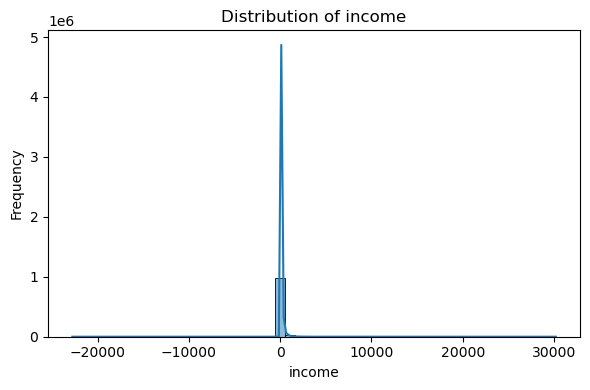

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df['income'], bins=50, kde=True)
plt.title('Distribution of income')
plt.xlabel('income')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#what does negative income mean? Does it balance out with positive income when aggregating?


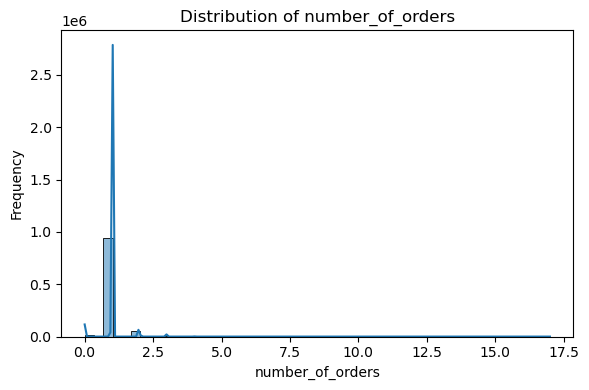

In [31]:
plt.figure(figsize=(6,4))
sns.histplot(df['number_of_orders'], bins=50, kde=True)
plt.title('Distribution of number_of_orders')
plt.xlabel('number_of_orders')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()



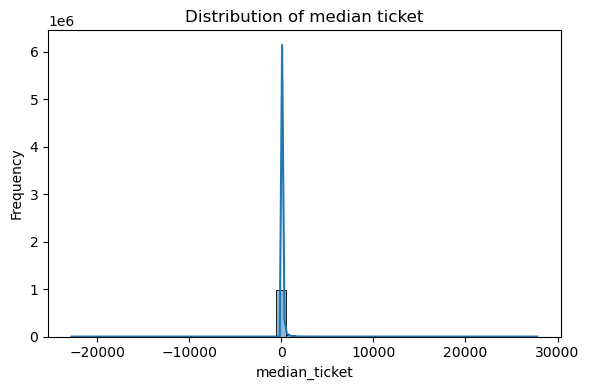

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df['median_ticket'], bins=50, kde=True)
plt.title('Distribution of median ticket')
plt.xlabel('median_ticket')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#same thing happens here as with income --> not sure if this balances out later on.

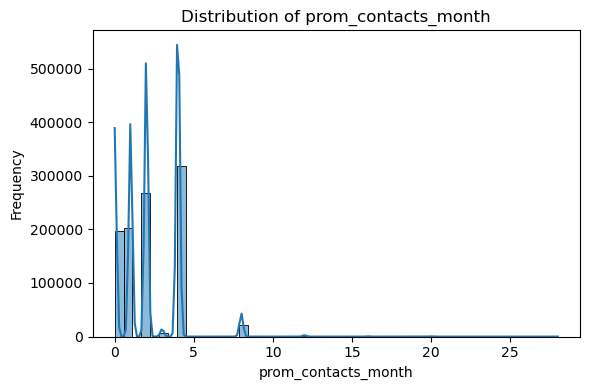

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df['prom_contacts_month'], bins=50, kde=True)
plt.title('Distribution of prom_contacts_month')
plt.xlabel('prom_contacts_month')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#most contacts are between 0 and 5 per month --> more might be outlier?

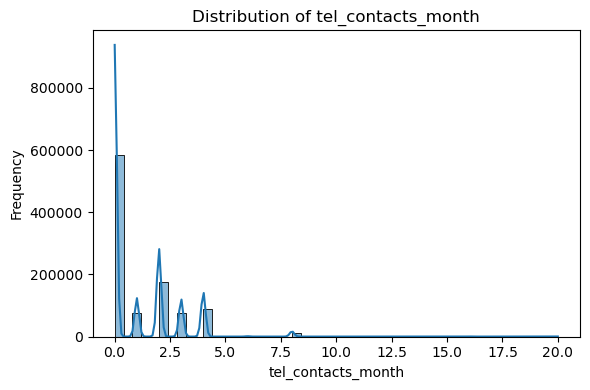

In [34]:
plt.figure(figsize=(6,4))
sns.histplot(df['tel_contacts_month'], bins=50, kde=True)
plt.title(f'Distribution of tel_contacts_month')
plt.xlabel('tel_contacts_month')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

📌 2. Efficiency Analysis

Why: Your objective includes increasing promotor efficiency.

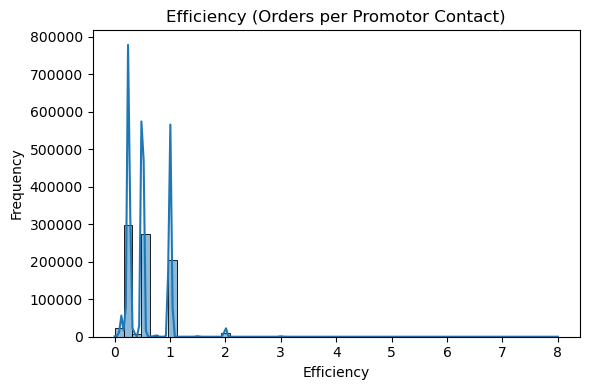

In [ ]:
df['efficiency'] = df['number_of_orders'] / df['prom_contacts_month']

# Handle division by zero if needed
df['efficiency'] = df['efficiency'].replace([float('inf'), -float('inf')], None)

# Visualize
plt.figure(figsize=(6,4))
sns.histplot(df['efficiency'], bins=50, kde=True)
plt.title('Efficiency (Orders per Promotor Contact)')
plt.xlabel('Efficiency')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# In theory, the number of contacts and orders should be aligned --> efficiency should equal 1
## less than 1 (most cases) --> The number of orders is lower than the number of contacts meaning team inefficiency

In [ ]:
df[df['efficiency'] < 1].shape  # Inefficient clients

(602959, 12)

📌 3. Low Ticket Clients

Why: Ticket < €80 is flagged as risky in the business rules

Number of clients with median ticket < 80: 410308


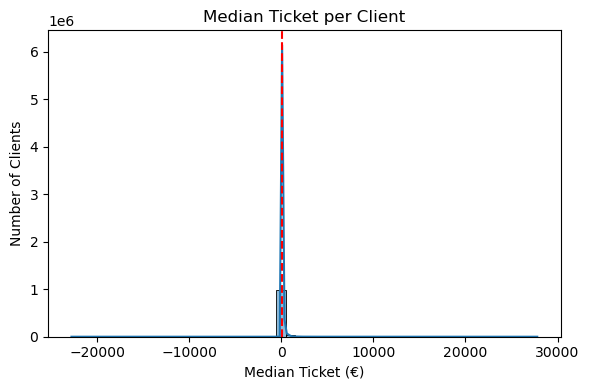

In [37]:
low_ticket_clients = df[df['median_ticket'] < 80]
print(f"Number of clients with median ticket < 80: {len(low_ticket_clients)}")

# Histogram of ticket sizes
plt.figure(figsize=(6,4))
sns.histplot(df['median_ticket'], bins=50, kde=True)
plt.axvline(80, color='red', linestyle='--')
plt.title('Median Ticket per Client')
plt.xlabel('Median Ticket (€)')
plt.ylabel('Number of Clients')
plt.tight_layout()
plt.show()


📌 4. Contact vs Orders Alignment

Why: Misalignment = inefficiency, key optimization goal.

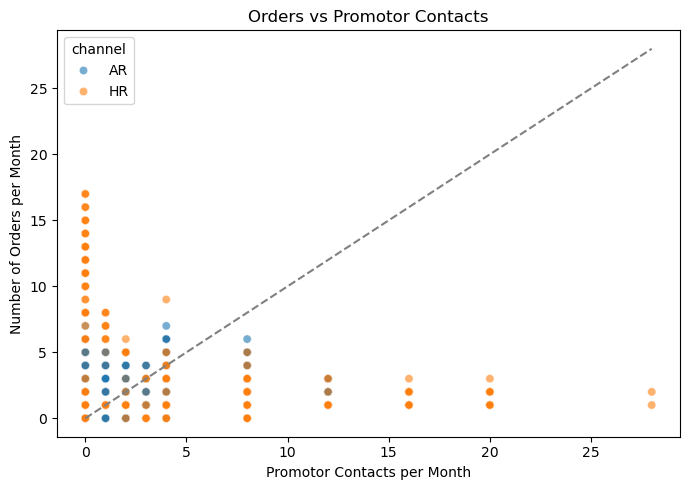

In [38]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='prom_contacts_month', y='number_of_orders', hue='channel', alpha=0.6)
plt.plot([0, df['prom_contacts_month'].max()], [0, df['prom_contacts_month'].max()], '--', color='grey')
plt.title('Orders vs Promotor Contacts')
plt.xlabel('Promotor Contacts per Month')
plt.ylabel('Number of Orders per Month')
plt.tight_layout()
plt.show()


This shows you:

How many clients are below the diagonal = more contacts than orders = inefficiency.

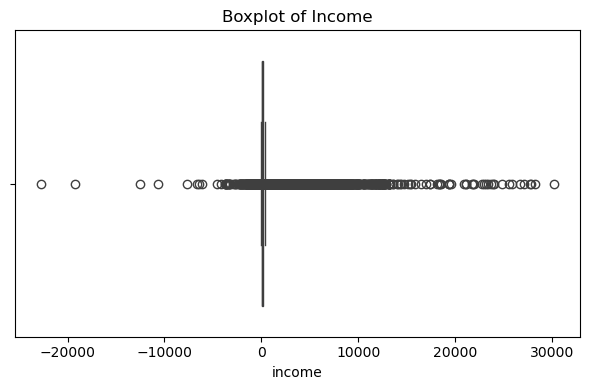

In [40]:
# Boxplots to detect outliers
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='income')
plt.title('Boxplot of Income')
plt.tight_layout()
plt.show()


In [ ]:
# question --> are you sure what you are doing with the aggregation? Why would you sum the monhtly tel/prom contacts? Arent they monthly?

In [ ]:
df.head()

,date,city,channel,client_id,promotor_id,volume,income,number_of_orders,median_ticket,prom_contacts_month,tel_contacts_month,efficiency
0,2024-01-01,Alicante,AR,398150871,729030652,5.94,0.00,1,0.00,0,0,None
1,2024-01-01,Alicante,HR,410234355,551409294,48.00,21.02,1,21.02,4,0,0.25
2,2024-01-02,Alicante,AR,123463493,551409294,125.25,92.57,1,92.57,1,0,1.0
3,2024-01-02,Alicante,AR,124527399,729030652,83.00,60.94,1,60.94,4,0,0.25
4,2024-01-02,Alicante,AR,130100821,729030652,768.00,244.33,1,244.33,1,3,1.0


In [42]:
df.sort_values(by = ['client_id', 'date'])

,date,city,channel,client_id,promotor_id,volume,income,number_of_orders,median_ticket,prom_contacts_month,tel_contacts_month,efficiency
473911,2024-01-16,Madrid,AR,100006690,275609911,118.032,123.89,1,123.89,2,0,0.5
484891,2024-01-30,Madrid,AR,100006690,275609911,84.468,80.10,1,80.10,2,0,0.5
496216,2024-02-13,Madrid,AR,100006690,275609911,134.264,76.88,1,76.88,2,0,0.5
506716,2024-02-27,Madrid,AR,100006690,275609911,60.852,83.78,1,83.78,2,0,0.5
512081,2024-03-05,Madrid,AR,100006690,275609911,54.000,33.00,1,33.00,2,0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...
238322,2024-10-01,Barcelona,HR,999976985,996963848,107.000,407.92,1,407.92,1,0,1.0
244075,2024-10-10,Barcelona,HR,999976985,996963848,39.000,186.58,1,186.58,1,0,1.0
251843,2024-10-24,Barcelona,HR,999976985,996963848,63.000,211.83,1,211.83,1,0,1.0
258933,2024-11-07,Barcelona,HR,999976985,996963848,48.000,50.50,1,50.50,1,0,1.0
